# Image grid in python using Vanill Numpy

In [56]:
import numpy as np    
from matplotlib import pyplot as plt
import os
import cv2 # only for reading and saving image

In [57]:
def resize(image , width , height) :
    '''
    This function takes numpy image array and resizes it to the given 
    width and height
    '''

    s_x =  width / image.shape[1]
    s_y = height/ image.shape[0]
    black_img = np.zeros((height,width,3), dtype=np.uint8)
    for i in range(0,width):
        for j in range(0,height):
            black_img[j][i][:] = image[int(j / s_y)][int(i / s_x)][:]
    return black_img

In [63]:
def make_square(image,background_color = "black"):
    '''
    This function takes numpy image array and makes them squared image.
    It either fills black or white background based on the given argument
    '''
    height = image.shape[0]
    width = image.shape[1]

    if height == width : 
        return image
    else :
        max_dim = max(height, width)
        min_dim = min(width, height)
        d_1 = int((max_dim - min_dim) / 2)
        d_2 = max_dim - min_dim - d_1

        if max_dim == width:
            top = np.zeros((d_1, width, 3), dtype=np.uint8)
            bottom = np.zeros((d_2, width, 3), dtype=np.uint8)
            if background_color == "white" :
                top.fill(255)
                bottom.fill(255)
            return np.concatenate((top, image, bottom), axis=0)
        else:
            left = np.zeros((height, d_1, 3), dtype=np.uint8)
            right = np.zeros((height, d_2, 3), dtype=np.uint8)
            if background_color == "white" :
                left.fill(255)
                right.fill(255)
            return np.concatenate((left, image, right), axis=1)

In [59]:
def make_grid(img_list, row, col, partition_size, background_color="black"):
    '''
    Takes the list of numpy array ( images ) and forms a grid based on the
    row and column
    '''

    if row * col < len(img_list):
        print("warning all the images aren't shown due to insufficient grid space. Expand row or col.")
    
    grid = np.zeros((row * partition_size, col * partition_size, 3), dtype=np.uint8)
    if background_color == "white" :
        grid.fill(255)
    count = 0
    
    for i in range(row):
        for j in range(col):
            if count < len(img_list):
                img = resize(make_square(img_list[count], background_color), partition_size, partition_size)
                grid[i * partition_size: (i + 1) * partition_size, j * partition_size: (j + 1) * partition_size] = img
                count += 1
            else:
                break
    
    return grid

In [60]:
def load_images_from_directory(directory):
    '''
    Reads image from the directory path and returns the image list in numpy array
    '''
    image_files = [f for f in os.listdir(directory) if os.path.isfile(os.path.join(directory, f))]
    image_list = []
    
    for file in image_files:
        if file.endswith(".jpg") or file.endswith(".png") or file.endswith(".jpeg"):
            image_path = os.path.join(directory, file)
            image_array = cv2.imread(image_path)
            image_list.append(image_array)
    
    return image_list

In [61]:
# Directory where the images are stored
directory_path = "/home/swodesh/Documents/EKbana/swodeshsharma/Task15_Image_grid/image_grid"
images_list = load_images_from_directory(directory_path)

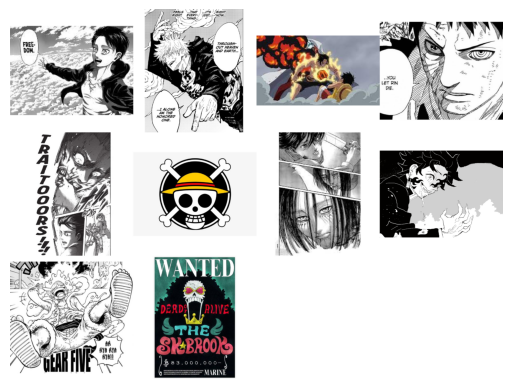

In [62]:
img = make_grid(images_list,3,4,1000,background_color= "white")
cv2.imwrite("grid_image.jpeg",img)
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.axis('off')  # Turn off axis
plt.show()
 

warning all the images aren't shown due to insufficient grid space. Expand row or col.


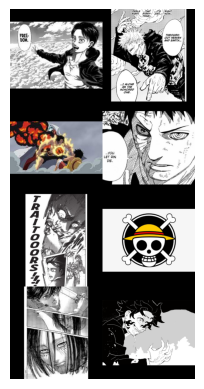

In [64]:
img = make_grid(images_list,4,2,1000,background_color= "black")
cv2.imwrite("grid_image2.jpeg",img)
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.axis('off')  # Turn off axis
plt.show()
 